In [102]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 


pd.options.display.max_columns = 100 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from scipy import stats

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize as WordTokenizer

nltk.download('punkt')
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fullc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
yelp_business = pd.read_csv('yelp_business.csv')
yelp_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,NaN,3101 Washington Rd,McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,NaN,"6025 N 27th Ave, Ste 1",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,Sports Authority,NaN,"5000 Arizona Mills Cr, Ste 435",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [104]:
yelp_review = pd.read_csv('yelp_review.csv')
yelp_review.head()

C:\Users\fullc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5.0,2016-05-28,Super simple place but amazing nonetheless. It...,0.0,0.0,0.0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5.0,2016-05-28,Small unassuming place that changes their menu...,0.0,0.0,0.0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5.0,2016-05-28,Lester's is located in a beautiful neighborhoo...,0.0,0.0,0.0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4.0,2016-05-28,Love coming here. Yes the place always needs t...,0.0,0.0,0.0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4.0,2016-05-28,Had their chocolate almond croissant and it wa...,0.0,0.0,0.0


In [105]:
df1 = yelp_business
df2 = yelp_review

In [106]:
merge = pd.merge(df1, df2,on = 'business_id')
merge.shape

(5303672, 21)

In [107]:
merge.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,3_-fne2m2GvKESZRlULAiw,jTvKkNTat9QftSxL_FMcQw,5.0,2017-02-22,"They make a plan, for your mouth to get health...",0.0,0.0,0.0
1,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,5gJk64TDq5lqSuoNiaqjVQ,IG6XMgQyWF2_RW1nKEioxA,5.0,2015-01-20,I have extreme anxiety when it comes to the de...,1.0,0.0,0.0
2,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,5570rwX_o30Z3NmKhou4CQ,2Rh41EBjWI137N2m5VHJJA,5.0,2013-06-06,I've only been here once but my husband has be...,3.0,0.0,0.0
3,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,iRm438GDAajUiW2GoIAvtA,YcmNpPM0ag94g4T0zAtdcg,4.0,2016-05-07,Great experience with the hygenists and pediat...,0.0,0.0,0.0
4,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,9lhJwhRwTsqqPyyoSjMuqw,XGL7VDkeUyM5nKQspJBTNw,5.0,2014-04-13,My husband and I went to this dentist as a rec...,1.0,0.0,0.0


In [108]:
merge.isnull().sum()

business_id           0
name                  0
neighborhood    2713205
address           79222
city                  5
state                12
postal_code        5501
latitude             25
longitude            25
stars_x               0
review_count          0
is_open               0
categories            0
review_id             0
user_id               0
stars_y               0
date                  0
text                  0
useful            42012
funny             42012
cool              42012
dtype: int64

In [109]:
df = merge.dropna()

In [110]:
df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
182,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,LaDy1xa2pT_0LVPE5ttqNA,abKWkITa8aNVL9qCLeYhJA,4.0,2017-11-10,I have been renting with BDJ for the past 2 ye...,0.0,1.0,0.0
183,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,gn700kqKrUdVFdTe6kEv2g,JcXxwwyu8FFbvmdcr-XKvg,1.0,2017-10-03,Beware!!! I had the UNFORTUNATE experience of ...,0.0,0.0,0.0
184,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,_HUrSi6MqOC3NG5veS6cqw,AAZXOuL_uX0uWZHzAy7okg,5.0,2017-08-30,I have been living in a BDJ managed home for 5...,0.0,0.0,0.0
185,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,8GU3cPYg2hOmCmzaCDEmqg,ZVh5Hd8fgp2mdRKwr_Akiw,5.0,2017-09-29,I've rented from BDJ in the past and based on ...,0.0,1.0,0.0
186,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,zVK_QrvaLTiHHdclUEGplw,wYNrtliExVU8hR6agFwDsQ,5.0,2017-11-14,I have been renting my awsume condo for 2.5 yr...,0.0,1.0,0.0


In [111]:
df["state"].value_counts()

NV     1454432
ON      452430
NC      173862
PA      151936
QC      138835
OH       76189
WI       64078
EDH      42225
BW        9780
MLN       1375
FL         557
GLG         82
XGL         27
NTH         17
TAM         12
MT          12
SC          10
KHL          7
SCB          6
ZET          4
WA           4
AZ           4
NE           4
GA           3
FIF          3
CA           3
Name: state, dtype: int64

In [112]:
df = df[(df["state"] == "NV")]
df.head()
#df.to_csv("yelp_NV.csv", index=None)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
182,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,LaDy1xa2pT_0LVPE5ttqNA,abKWkITa8aNVL9qCLeYhJA,4.0,2017-11-10,I have been renting with BDJ for the past 2 ye...,0.0,1.0,0.0
183,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,gn700kqKrUdVFdTe6kEv2g,JcXxwwyu8FFbvmdcr-XKvg,1.0,2017-10-03,Beware!!! I had the UNFORTUNATE experience of ...,0.0,0.0,0.0
184,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,_HUrSi6MqOC3NG5veS6cqw,AAZXOuL_uX0uWZHzAy7okg,5.0,2017-08-30,I have been living in a BDJ managed home for 5...,0.0,0.0,0.0
185,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,8GU3cPYg2hOmCmzaCDEmqg,ZVh5Hd8fgp2mdRKwr_Akiw,5.0,2017-09-29,I've rented from BDJ in the past and based on ...,0.0,1.0,0.0
186,kCoE3jvEtg6UVz5SOD3GVw,BDJ Realty,Summerlin,"2620 Regatta Dr, Ste 102",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services...,zVK_QrvaLTiHHdclUEGplw,wYNrtliExVU8hR6agFwDsQ,5.0,2017-11-14,I have been renting my awsume condo for 2.5 yr...,0.0,1.0,0.0


In [113]:
df.shape

(1454432, 21)

In [114]:
df_sample = df.sample(frac=0.05)
#df_sample.to_csv("yelp_NV_sample.csv", index=None)

In [115]:
df_sample.shape

(72722, 21)

In [116]:
df = df_sample

In [117]:
df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
2370479,KyzPvdGPb2ubVlXJrS2QPA,Pizzalicious,Spring Valley,5447 S Rainbow Blvd,Las Vegas,NV,89118,36.090072,-115.243902,4.5,141,1,Food;Restaurants;Pizza;Sandwiches;Food Deliver...,xl4kJuZkLg7oSViKAGV1OA,bWJWcQyDKtFSvsTW2tR3hw,5.0,2017-04-13,The crust reminds me of a better version of Pi...,2.0,0.0,1.0
4676875,j5nPiTwWEFr-VsePew7Sjg,Ichiza,Chinatown,4355 Spring Mountain Rd,Las Vegas,NV,89102,36.125908,-115.197904,4.0,1378,1,Japanese;Restaurants,dEP0Pp9GriRSyv8fFplF3A,joyw52G3uAF0eqhq6LfL_A,4.0,2011-10-01,"Wagyu Garlic Fried Rice, Hamachi Tartare, Kaki...",0.0,0.0,1.0
4588606,avnIYScsA-gUHZxIn9JfzQ,Bob's Big Boy,Centennial,7125 N Durango,Las Vegas,NV,89149,36.290462,-115.288456,1.5,6,0,American (New);Restaurants,TFJGPzR7q3FzrmmaYltvew,UkIVcV9hPB0GP05PQGqb1g,1.0,2008-01-30,"I came here when they opened, it was OK. As ti...",1.0,1.0,1.0
2792749,WI1xBMN_rEaVPOL9Ad2gpQ,Tom Colicchio's Heritage Steak,The Strip,3400 Las Vegas Blvd S,Las Vegas,NV,89109,36.121608,-115.174000,3.5,388,1,Beer;Wine & Spirits;Bars;Diners;Restaurants;Wi...,IYsmFFeL9PDtmBOnT4ElwA,53O6cn30yJtFDvDG6WhdUg,1.0,2016-08-05,My family stopped by there the other night (tu...,0.0,1.0,0.0
606478,Hw2KqhSUHIat3BHZiJVVsw,My Zen 11 Energy Healing with Michael Malherek,Southeast,"5795 S Sandhill Rd, Ste B",Las Vegas,NV,89120,36.084323,-115.092066,5.0,8,1,Fitness & Instruction;Yoga;Active Life;Reiki;M...,SNFSrZEz08yBfDzKxSK7mg,Wte3aYa60JK7xVUztXhfvA,5.0,2017-06-26,"Beautiful and real. Michael is the real deal, ...",0.0,0.0,0.0


In [118]:
df['text'] = df['text'].astype('string')
df["text"].dtype

StringDtype

In [119]:
rest = df[df.categories.str.contains("Restaurants") | df.categories.str.contains("Bars")]
rest.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
2370479,KyzPvdGPb2ubVlXJrS2QPA,Pizzalicious,Spring Valley,5447 S Rainbow Blvd,Las Vegas,NV,89118,36.090072,-115.243902,4.5,141,1,Food;Restaurants;Pizza;Sandwiches;Food Deliver...,xl4kJuZkLg7oSViKAGV1OA,bWJWcQyDKtFSvsTW2tR3hw,5.0,2017-04-13,The crust reminds me of a better version of Pi...,2.0,0.0,1.0
4676875,j5nPiTwWEFr-VsePew7Sjg,Ichiza,Chinatown,4355 Spring Mountain Rd,Las Vegas,NV,89102,36.125908,-115.197904,4.0,1378,1,Japanese;Restaurants,dEP0Pp9GriRSyv8fFplF3A,joyw52G3uAF0eqhq6LfL_A,4.0,2011-10-01,"Wagyu Garlic Fried Rice, Hamachi Tartare, Kaki...",0.0,0.0,1.0
4588606,avnIYScsA-gUHZxIn9JfzQ,Bob's Big Boy,Centennial,7125 N Durango,Las Vegas,NV,89149,36.290462,-115.288456,1.5,6,0,American (New);Restaurants,TFJGPzR7q3FzrmmaYltvew,UkIVcV9hPB0GP05PQGqb1g,1.0,2008-01-30,"I came here when they opened, it was OK. As ti...",1.0,1.0,1.0
2792749,WI1xBMN_rEaVPOL9Ad2gpQ,Tom Colicchio's Heritage Steak,The Strip,3400 Las Vegas Blvd S,Las Vegas,NV,89109,36.121608,-115.174000,3.5,388,1,Beer;Wine & Spirits;Bars;Diners;Restaurants;Wi...,IYsmFFeL9PDtmBOnT4ElwA,53O6cn30yJtFDvDG6WhdUg,1.0,2016-08-05,My family stopped by there the other night (tu...,0.0,1.0,0.0
3151767,HmeRzfULqmvcx_3TRe_tBw,Cevicheria El Diamante,Southeast,2457 E Tropicana Ave,Las Vegas,NV,89121,36.099845,-115.117184,4.0,52,1,Mexican;Seafood;Restaurants,PbnKYCvUBIfROLPx5pTeOA,paOuMODPMF1LCaYYC4PqRQ,5.0,2017-10-09,I've tried around 10 Mexican seafood places in...,0.0,0.0,0.0


In [120]:
rest.shape

(46049, 21)

In [121]:
#rest.to_csv("yelp_NV_sample_RestandBars.csv", index=None)

In [154]:
df = rest
df['category']=pd.Series()
# Restaurants
df.loc[df.categories.str.contains('Fast Food'),'category'] = 'Fast Food'
df.loc[df.categories.str.contains('American'),'category'] = 'American'
df.loc[df.categories.str.contains('Mexican'), 'category'] = 'Mexican'
df.loc[df.categories.str.contains('Italian'), 'category'] = 'Italian'
df.loc[df.categories.str.contains('Japanese'), 'category'] = 'Japanese'
df.loc[df.categories.str.contains('Chinese'), 'category'] = 'Chinese'
df.loc[df.categories.str.contains('Thai'), 'category'] = 'Thai'
df.loc[df.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
df.loc[df.categories.str.contains('French'), 'category'] = 'French'
df.loc[df.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
df.loc[df.categories.str.contains('Greek'),'category'] = 'Greek'
df.loc[df.categories.str.contains('German'),'category'] = 'German'
df.loc[df.categories.str.contains('Indian'),'category'] = 'Indian'
df.loc[df.categories.str.contains('Korean'),'category'] = 'Korean'
df.loc[df.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
df.loc[df.categories.str.contains('African'),'category'] = 'African'
df.loc[df.categories.str.contains('Spanish'),'category'] = 'Spanish'
df.loc[df.categories.str.contains('Coffee'),'category'] = 'Cafe'
df.loc[df.categories.str.contains('Cafes'),'category'] = 'Cafe'
df.loc[df.categories.str.contains('Bakeries'),'category'] = 'Bakery'
df.loc[df.categories.str.contains('Vegan'),'category'] = 'Vegan'
df.loc[df.categories.str.contains('Steak'),'category'] = 'Steakhouse'
df.loc[df.categories.str.contains('Steakhouses'),'category'] = 'Steakhouse'
df.loc[df.categories.str.contains('Seafood'),'category'] = 'Seafood'
df.loc[df.categories.str.contains('Acai'),'category'] = 'Juice Bar'
df.loc[df.categories.str.contains('Smoothie'),'category'] = 'Juice Bar'
df.loc[df.categories.str.contains('Bubble Tea'),'category'] = 'Juice Bar'
df.loc[df.categories.str.contains('Barbeque'),'category'] = 'Barbeque'
df.loc[df.categories.str.contains('Sushi'),'category'] = 'Sushi'
df.loc[df.categories.str.contains('Pizza'),'category'] = 'Pizza'
df.loc[df.categories.str.contains('Ice cream'),'category'] = 'Ice Cream Parlor'
df.loc[df.categories.str.contains('Buffets'),'category'] = 'Buffets'
df.loc[df.categories.str.contains('Breakfast & Brunch'),'category'] = 'Breakfast'
df.loc[df.categories.str.contains('Burgers'),'category'] = 'Burger'
df.loc[df.categories.str.contains('Brazilian'),'category'] = 'Brazilian'
df.loc[df.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
df.loc[df.categories.str.contains('Hot Dogs'), 'category'] = 'Hot Dogs'
df.loc[df.categories.str.contains('Cajun/Creole'), 'category'] = 'Cajun/Creole'
df.loc[df.categories.str.contains('Sandwiches'), 'category'] = 'Sandwich'
df.loc[df.categories.str.contains('Nightlife'), 'category'] = 'Nightlife'
df.loc[df.categories.str.contains('Bars'), 'category'] = 'Nightlife'
df.loc[df.categories.str.contains('Beer'), 'category'] = 'Nightlife'
df.loc[df.categories.str.contains('Wine Bars'), 'category'] = 'Nightlife'
df.loc[df.categories.str.contains('Shopping'), 'category'] = 'Shopping center Restaurant'
df.loc[df.categories.str.contains('Hotels'), 'category'] = 'Hotel'
df.loc[df.categories.str.contains('Food Trucks'), 'category'] = 'Food Trucks'
df.loc[df.categories.str.contains('Middle Eastern'), 'category'] = 'Middle Eastern'
df.loc[df.categories.str.contains('Halal'), 'category'] = 'Middle Eastern'
df.loc[df.categories.str.contains('Moroccan'), 'category'] = 'Middle Eastern'
df.loc[df.categories.str.contains('Filipino'), 'category'] = 'Filipino'
df.loc[df.categories.str.contains('Latin American'), 'category'] = 'Latin American'
df.loc[df.categories.str.contains('American (Traditional)'),'category'] = 'American'
df.loc[df.categories.str.contains('American (New)'),'category'] = 'American'
df.loc[df.categories.str.contains('Chicken Wings'),'category'] = 'Chicken Wings'
df.loc[df.categories.str.contains('Ethiopian'),'category'] = 'Ethiopian'



C:\Users\fullc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\fullc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\fullc\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\fullc\anaconda

In [123]:
df["category"].value_counts()

Nightlife          15440
Breakfast           3639
Sandwich            3287
Pizza               2071
Burger              1876
Mexican             1788
Seafood             1546
Chinese             1273
Buffets             1227
American            1159
Steakhouse          1140
Chicken Wings        952
Barbeque             945
Hotel                921
Italian              918
Thai                 774
Japanese             710
Vietnamese           680
Middle Eastern       629
Cafe                 537
Vegan                415
Cajun/Creole         412
Hawaiian             369
Latin American       333
French               326
Bakery               304
Filipino             277
Shopping center      259
Korean               243
Hot Dogs             215
Brazilian            199
Indian               176
Greek                146
Juice Bar            138
Food Trucks          116
Mediterranean         96
Fast Food             74
Spanish               53
Ethiopian             17
German                 8


In [124]:
df.isnull().sum()

business_id       0
name              0
neighborhood      0
address           0
city              0
state             0
postal_code       0
latitude          0
longitude         0
stars_x           0
review_count      0
is_open           0
categories        0
review_id         0
user_id           0
stars_y           0
date              0
text              0
useful            0
funny             0
cool              0
category        355
dtype: int64

In [156]:
df_categorized = df.dropna(axis=0, subset=['category'])
df_categorized.shape

(45694, 22)

In [157]:
del df_categorized['categories']

In [127]:
df_categorized=df_categorized.reset_index(drop=True)
df_categorized.head(10)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,review_id,user_id,stars_y,date,text,useful,funny,cool,category
0,KyzPvdGPb2ubVlXJrS2QPA,Pizzalicious,Spring Valley,5447 S Rainbow Blvd,Las Vegas,NV,89118,36.090072,-115.243902,4.5,141,1,xl4kJuZkLg7oSViKAGV1OA,bWJWcQyDKtFSvsTW2tR3hw,5.0,2017-04-13,The crust reminds me of a better version of Pi...,2.0,0.0,1.0,Sandwich
1,j5nPiTwWEFr-VsePew7Sjg,Ichiza,Chinatown,4355 Spring Mountain Rd,Las Vegas,NV,89102,36.125908,-115.197904,4.0,1378,1,dEP0Pp9GriRSyv8fFplF3A,joyw52G3uAF0eqhq6LfL_A,4.0,2011-10-01,"Wagyu Garlic Fried Rice, Hamachi Tartare, Kaki...",0.0,0.0,1.0,Japanese
2,avnIYScsA-gUHZxIn9JfzQ,Bob's Big Boy,Centennial,7125 N Durango,Las Vegas,NV,89149,36.290462,-115.288456,1.5,6,0,TFJGPzR7q3FzrmmaYltvew,UkIVcV9hPB0GP05PQGqb1g,1.0,2008-01-30,"I came here when they opened, it was OK. As ti...",1.0,1.0,1.0,American
3,WI1xBMN_rEaVPOL9Ad2gpQ,Tom Colicchio's Heritage Steak,The Strip,3400 Las Vegas Blvd S,Las Vegas,NV,89109,36.121608,-115.174000,3.5,388,1,IYsmFFeL9PDtmBOnT4ElwA,53O6cn30yJtFDvDG6WhdUg,1.0,2016-08-05,My family stopped by there the other night (tu...,0.0,1.0,0.0,Nightlife
4,HmeRzfULqmvcx_3TRe_tBw,Cevicheria El Diamante,Southeast,2457 E Tropicana Ave,Las Vegas,NV,89121,36.099845,-115.117184,4.0,52,1,PbnKYCvUBIfROLPx5pTeOA,paOuMODPMF1LCaYYC4PqRQ,5.0,2017-10-09,I've tried around 10 Mexican seafood places in...,0.0,0.0,0.0,Seafood
5,RO1h2JPbvp0QeqSHDJbeKw,Anchor Bar,The Strip,"The Venetian - Food Ct, 3377 Las Vegas Blvd So",Las Vegas,NV,89109,36.121863,-115.169649,4.0,52,0,6L4MrOcVahLn1mGm3q-jpQ,ml9jfCIkibr4GgDzEU_iTQ,5.0,2015-07-03,"After hearing all the hype, I had to give this...",1.0,0.0,0.0,Chicken Wings
6,KskYqH1Bi7Z_61pH6Om8pg,Lotus of Siam,Downtown,"953 E Sahara Ave, Ste A5",Las Vegas,NV,89104,36.143450,-115.142780,4.0,3964,1,pG5oMQTlWqdIhXOPJmhSyg,i7uZqwur5GcctrSSuQK8kg,5.0,2014-08-02,"The first time i came here, I was heavily unde...",3.0,1.0,0.0,Nightlife
7,ByXko9JQ6Jne7v8t4IaQjg,McDonald's,Southwest,8556 Blue Diamond Rd,Las Vegas,NV,89178,36.020642,-115.278034,1.5,69,1,IOb5beR1Z-TWh4yrrliUng,0CU01mNzL1CpmzFm1Ym_Ag,1.0,2017-11-05,The skinny black girl that was taking orders y...,0.0,0.0,0.0,Burger
8,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,The Strip,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.116113,-115.176222,4.0,7009,1,sVSQA5la-utitnFNrtCwxw,0-Zr9HZpkBMS0YomdBPKXw,5.0,2013-02-13,Fresh shucked oysters! they have 4-5 guys stan...,0.0,0.0,0.0,Sandwich
9,Vg1C_1eqwIwkZLIXGMTW3g,Crown & Anchor British Pub,University,1350 E Tropicana Ave,Las Vegas,NV,89119,36.101467,-115.134574,3.5,386,1,7zcIfNJFM1rcr6GT_UP1kQ,H3wPBzQCKCKiHcV7GZK4kg,5.0,2010-08-29,I've always had a good time in coming here. I...,1.0,1.0,1.0,Nightlife


In [128]:
df_categorized.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'review_id', 'user_id', 'stars_y', 'date', 'text', 'useful',
       'funny', 'cool', 'category'],
      dtype='object')

In [129]:
df_categorized.to_csv('Yelp_NV_categorized.csv')

In [130]:
df_categorized.isnull().sum()

business_id     0
name            0
neighborhood    0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars_x         0
review_count    0
is_open         0
review_id       0
user_id         0
stars_y         0
date            0
text            0
useful          0
funny           0
cool            0
category        0
dtype: int64

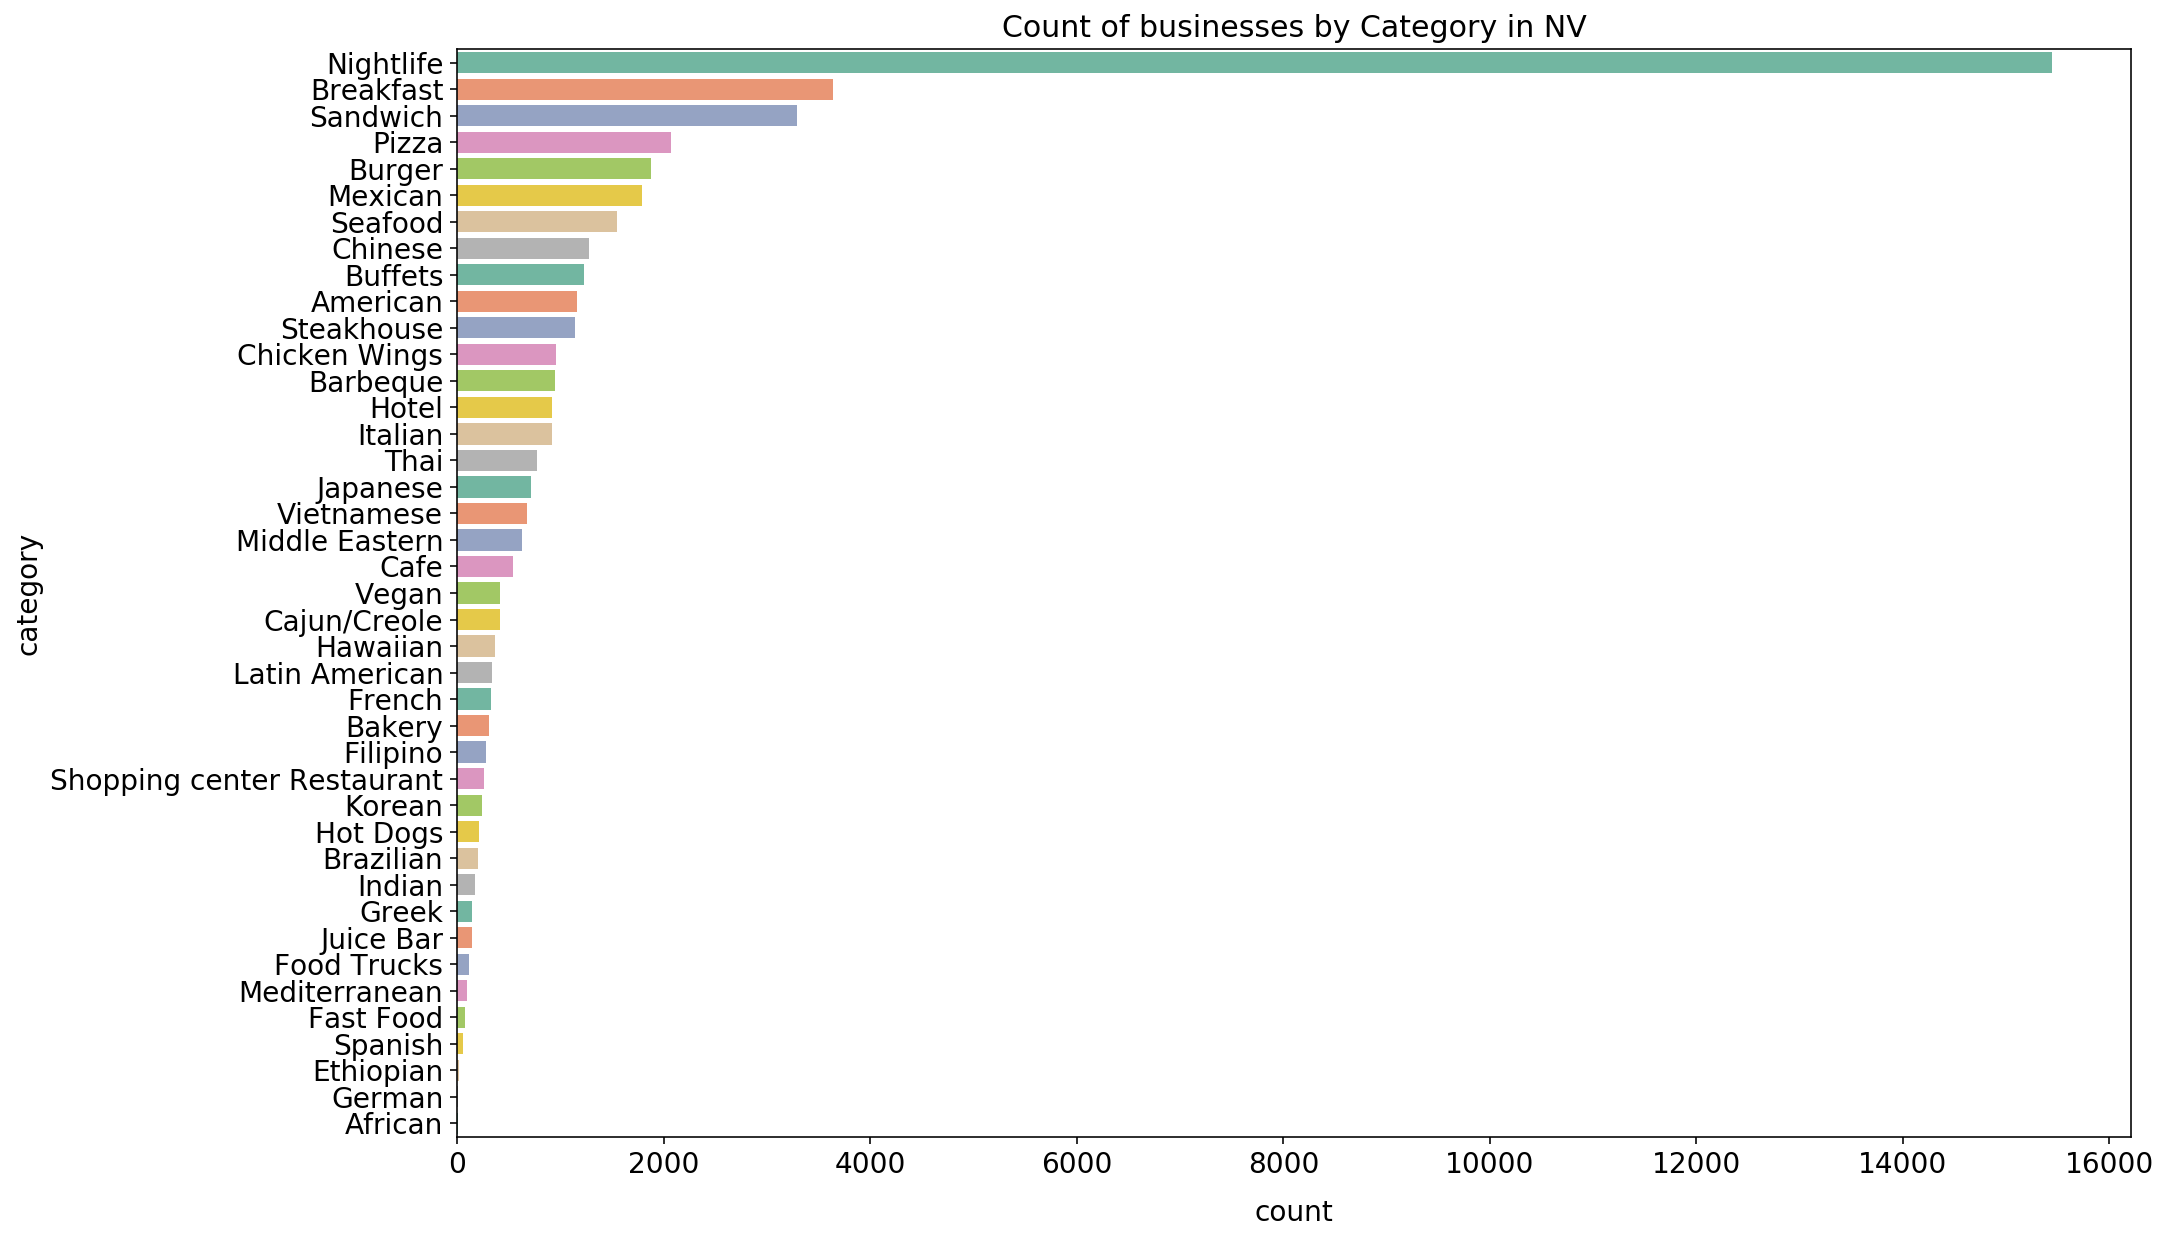

In [158]:
plt.figure(figsize=(15,10))
grouped = df_categorized.category.value_counts()
plt.xlabel('Number of businesses', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of businesses by Category in NV', fontsize=15)
plt.tick_params(labelsize=14)
sns.countplot(y='category',data=df_categorized, 
              order = grouped.index, palette= sns.color_palette("Set2", len(grouped)))

In [132]:
df_categorized.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,review_id,user_id,stars_y,date,text,useful,funny,cool,category
0,KyzPvdGPb2ubVlXJrS2QPA,Pizzalicious,Spring Valley,5447 S Rainbow Blvd,Las Vegas,NV,89118,36.090072,-115.243902,4.5,141,1,xl4kJuZkLg7oSViKAGV1OA,bWJWcQyDKtFSvsTW2tR3hw,5.0,2017-04-13,The crust reminds me of a better version of Pi...,2.0,0.0,1.0,Sandwich
1,j5nPiTwWEFr-VsePew7Sjg,Ichiza,Chinatown,4355 Spring Mountain Rd,Las Vegas,NV,89102,36.125908,-115.197904,4.0,1378,1,dEP0Pp9GriRSyv8fFplF3A,joyw52G3uAF0eqhq6LfL_A,4.0,2011-10-01,"Wagyu Garlic Fried Rice, Hamachi Tartare, Kaki...",0.0,0.0,1.0,Japanese
2,avnIYScsA-gUHZxIn9JfzQ,Bob's Big Boy,Centennial,7125 N Durango,Las Vegas,NV,89149,36.290462,-115.288456,1.5,6,0,TFJGPzR7q3FzrmmaYltvew,UkIVcV9hPB0GP05PQGqb1g,1.0,2008-01-30,"I came here when they opened, it was OK. As ti...",1.0,1.0,1.0,American
3,WI1xBMN_rEaVPOL9Ad2gpQ,Tom Colicchio's Heritage Steak,The Strip,3400 Las Vegas Blvd S,Las Vegas,NV,89109,36.121608,-115.174000,3.5,388,1,IYsmFFeL9PDtmBOnT4ElwA,53O6cn30yJtFDvDG6WhdUg,1.0,2016-08-05,My family stopped by there the other night (tu...,0.0,1.0,0.0,Nightlife
4,HmeRzfULqmvcx_3TRe_tBw,Cevicheria El Diamante,Southeast,2457 E Tropicana Ave,Las Vegas,NV,89121,36.099845,-115.117184,4.0,52,1,PbnKYCvUBIfROLPx5pTeOA,paOuMODPMF1LCaYYC4PqRQ,5.0,2017-10-09,I've tried around 10 Mexican seafood places in...,0.0,0.0,0.0,Seafood


In [133]:
df = df_categorized

In [134]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

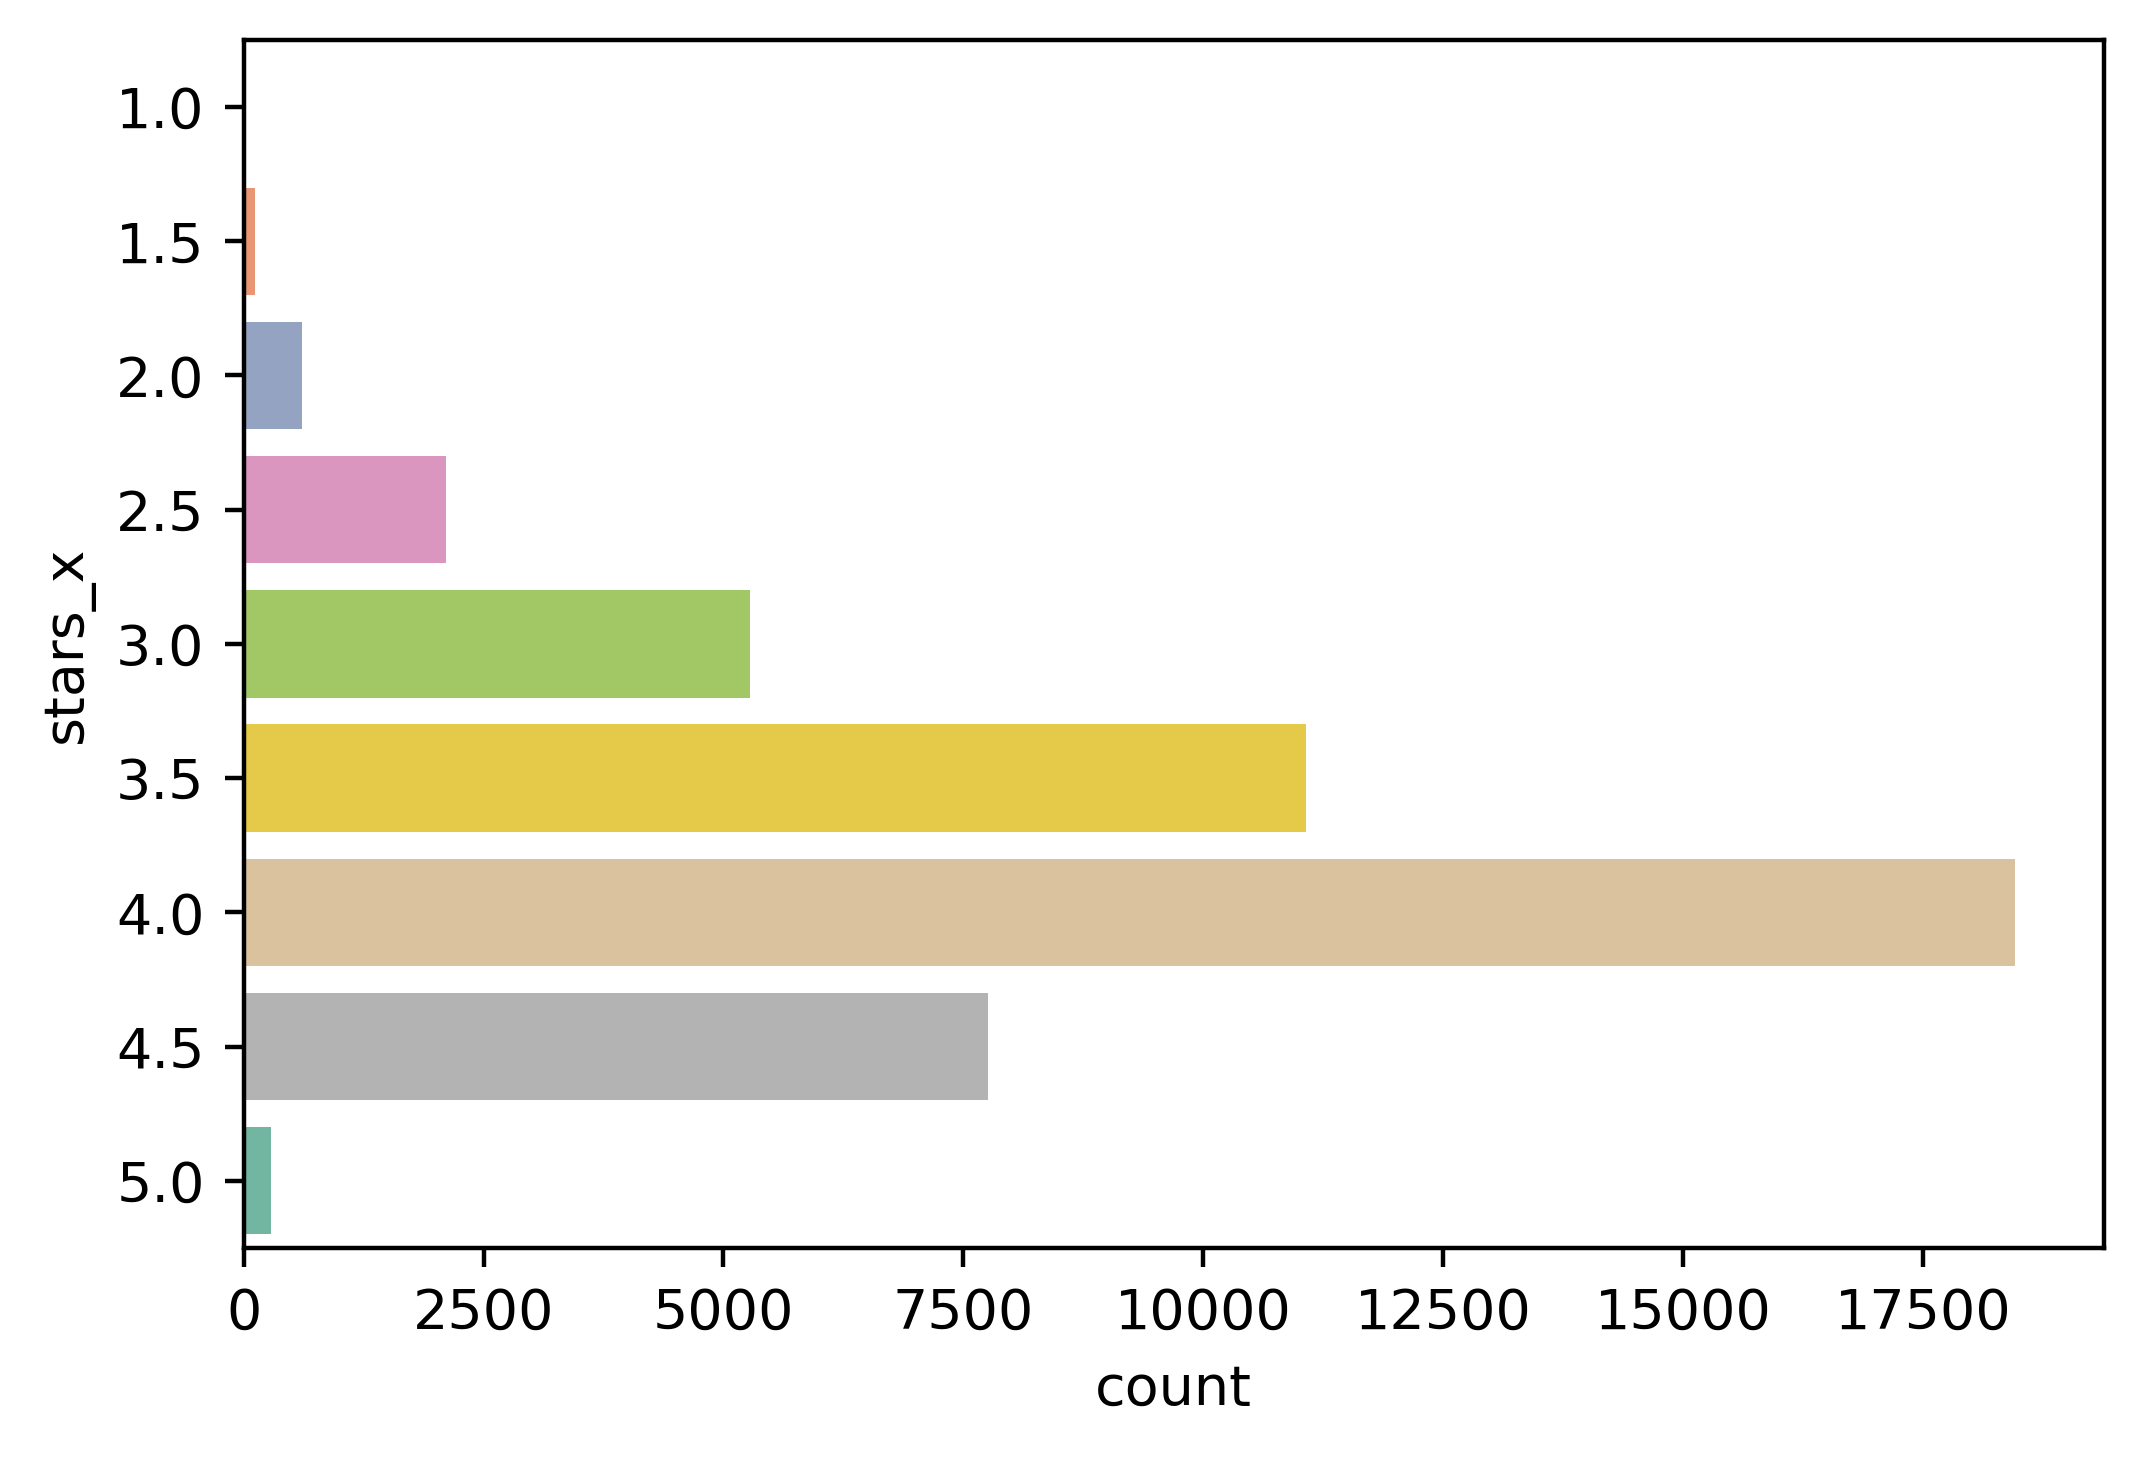

In [135]:
fig, ax = plt.subplots(dpi=200)
sns.countplot(data=df, y='stars_x',palette= sns.color_palette("Set2"))

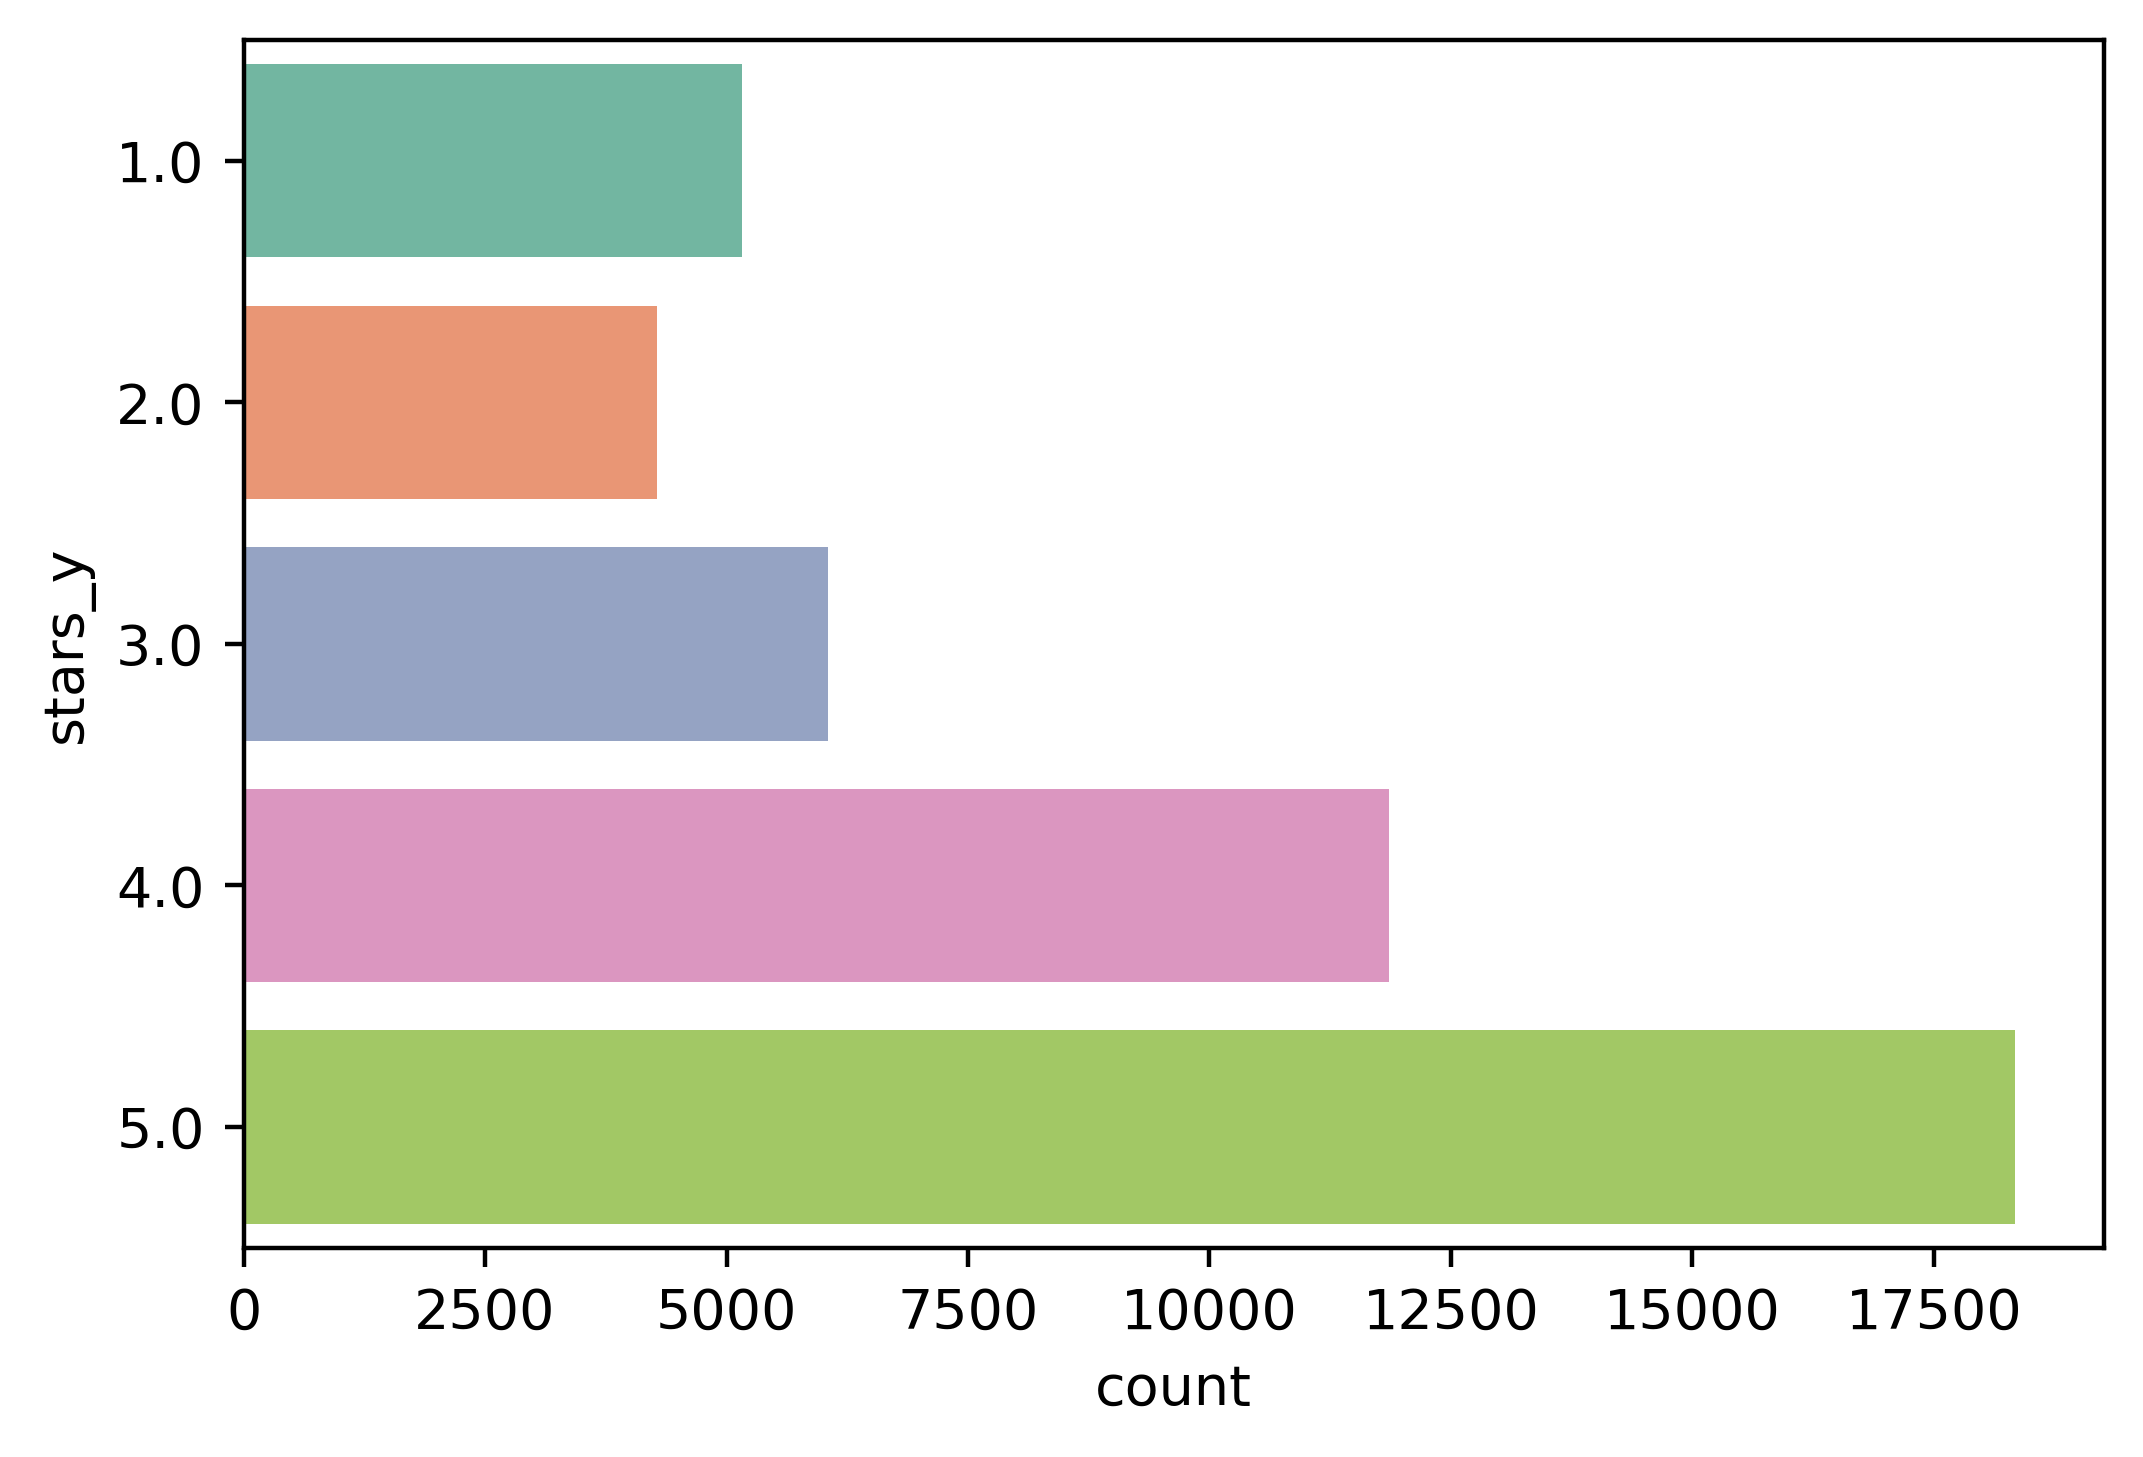

In [136]:
fig, ax = plt.subplots(dpi=200)
sns.countplot(data=df_categorized, y='stars_y',palette= sns.color_palette("Set2"))

In [137]:
df['business_id'].value_counts

<bound method IndexOpsMixin.value_counts of 0        KyzPvdGPb2ubVlXJrS2QPA
1        j5nPiTwWEFr-VsePew7Sjg
2        avnIYScsA-gUHZxIn9JfzQ
3        WI1xBMN_rEaVPOL9Ad2gpQ
4        HmeRzfULqmvcx_3TRe_tBw
                  ...          
45689    uuGL8diLlHfeUeFuod3F-w
45690    gNhxs9nPUSkVBSSIRQOgaA
45691    BMAflH82OUIMl2mHtP0MNQ
45692    OVTZNSkSfbl3gVB9XQIJfw
45693    BYQ6Wfh4hhKKLI71qhDWIw
Name: business_id, Length: 45694, dtype: object>

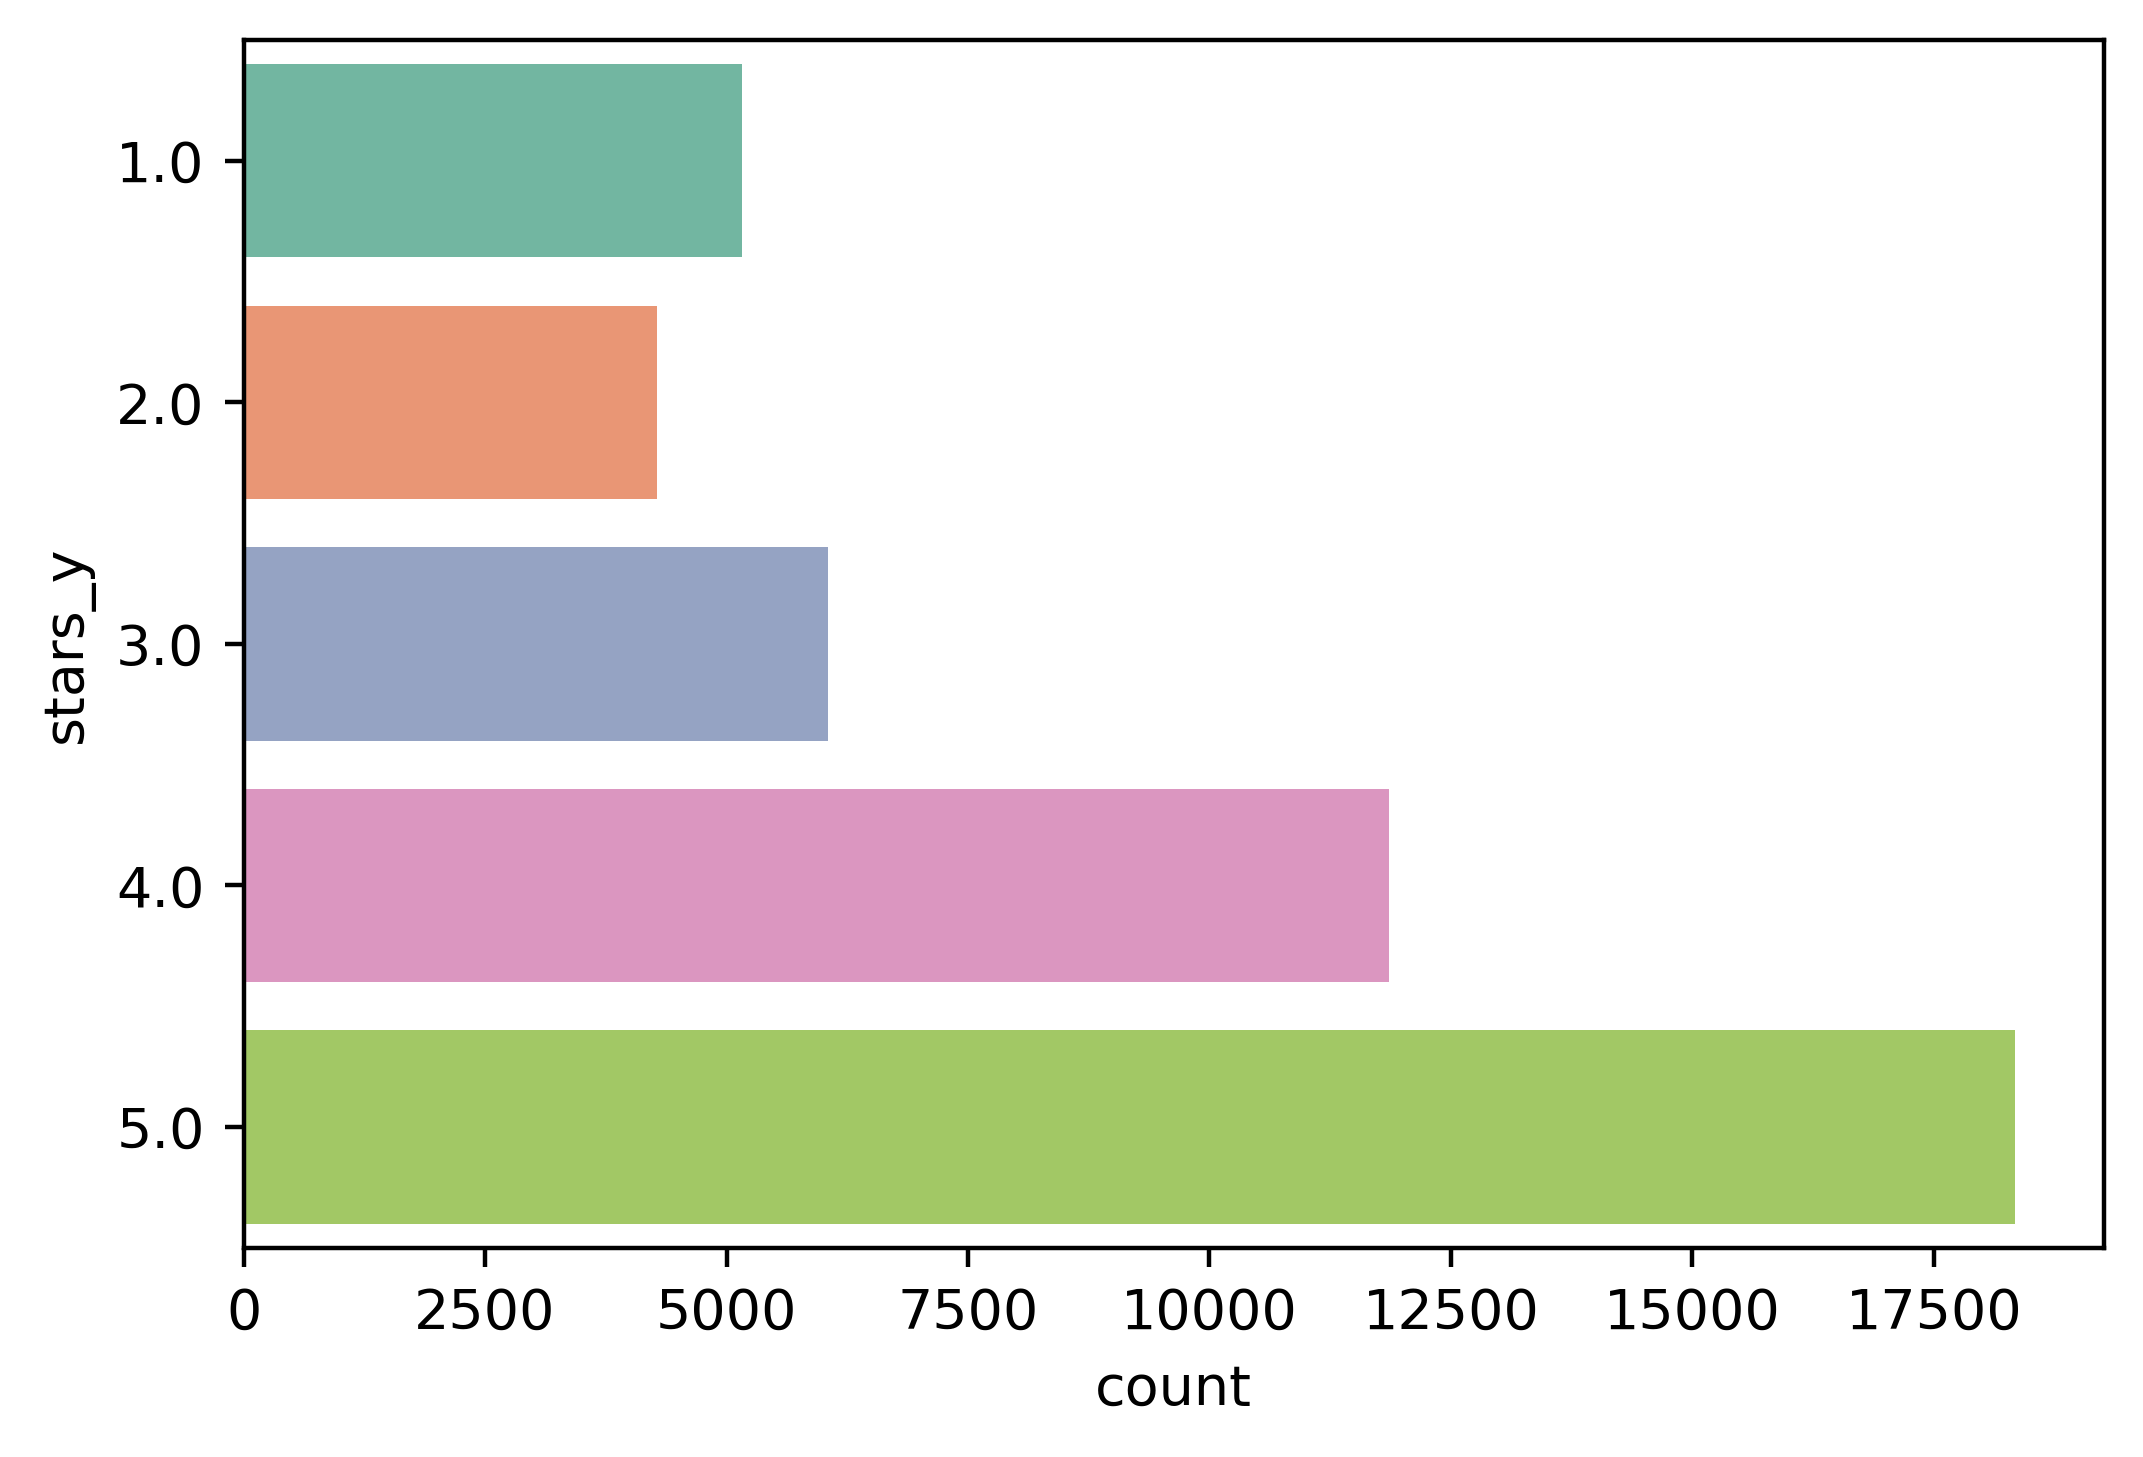

In [138]:
fig, ax = plt.subplots(dpi=200)
sns.countplot(data=df, y='stars_y',palette= sns.color_palette("Set2"))

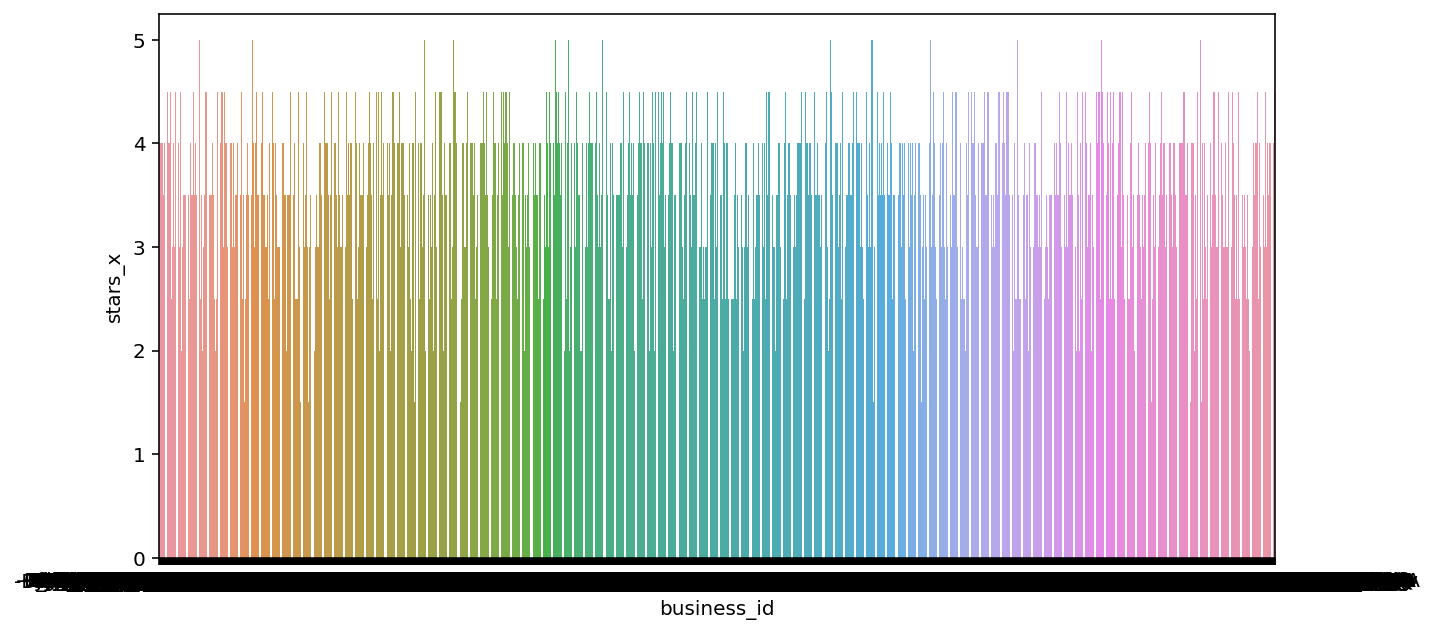

In [139]:
v1 = pd.pivot_table(data=df, index=['business_id'], values='stars_x',aggfunc='mean').reset_index()

plt.figure(figsize=[10,5])
img = sns.barplot(data=v1, x='business_id', y='stars_x')

In [140]:
df['name'].value_counts()

Hash House A Go Go            417
Mon Ami Gabi                  414
Bacchanal Buffet              344
Wicked Spoon                  321
Earl of Sandwich              256
                             ... 
Durango Lodge                   1
Thunderbird Hotel & Lounge      1
Pie Zanos                       1
Smuggle-Inn                     1
It's All Good BBQ & More        1
Name: name, Length: 3321, dtype: int64

In [141]:
busi5 = ['Hash House A Go Go','Bacchanal Buffet','Mon Ami Gabi','Wicked Spoon',
         'Gordon Ramsay BurGR']

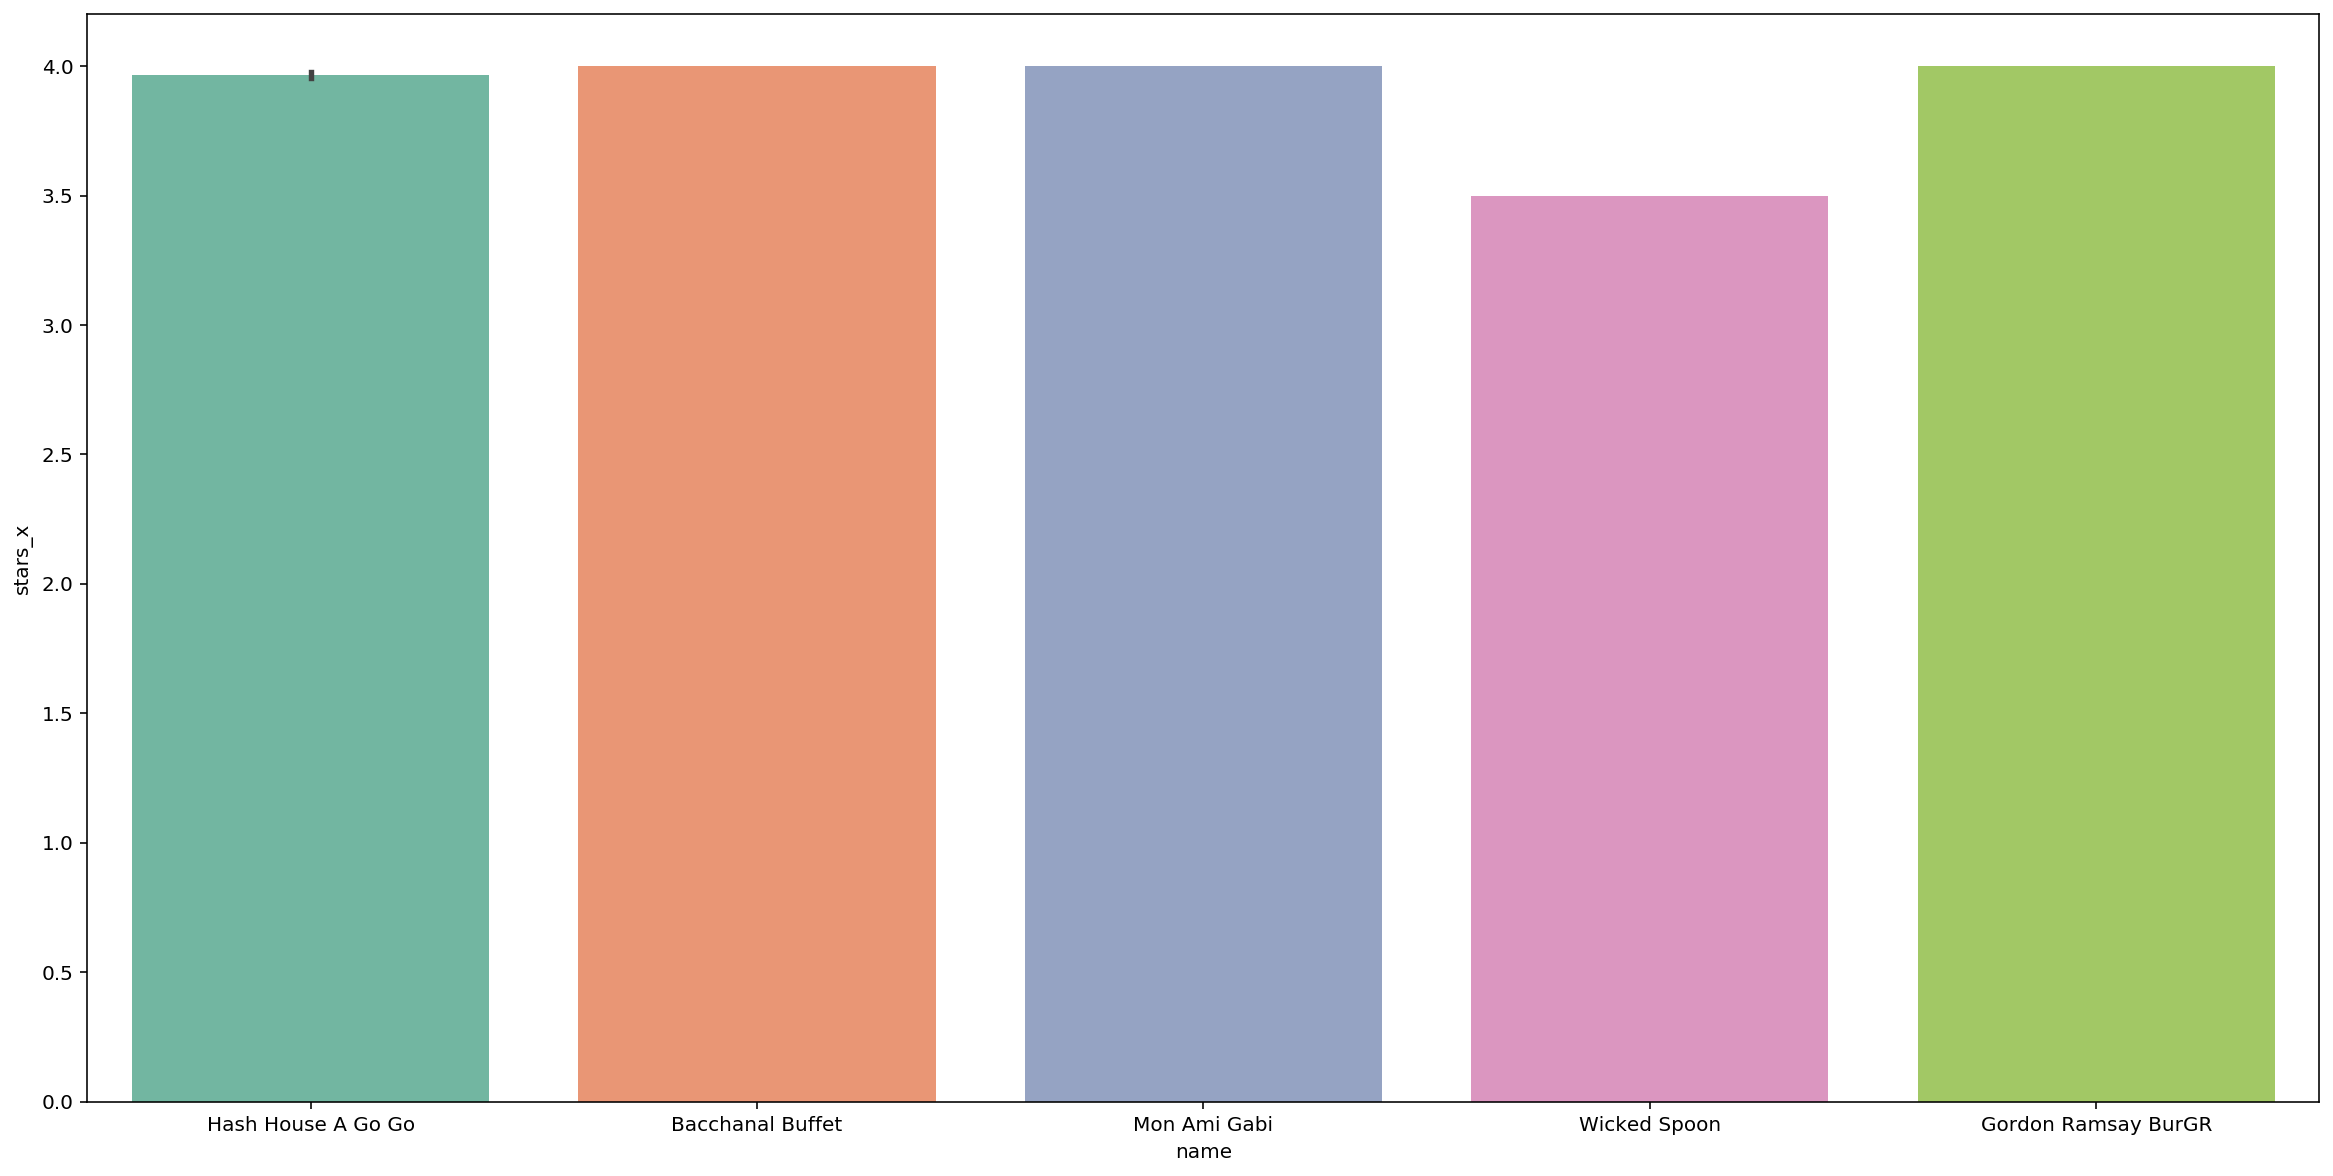

In [142]:
plt.figure(figsize=[20,10])
sns.barplot(data=df, x='name', y='stars_x', order=busi5, palette= sns.color_palette("Set2"))

In [143]:
df['stars_x'].describe()

count    45694.000000
mean         3.751718
std          0.580813
min          1.000000
25%          3.500000
50%          4.000000
75%          4.000000
max          5.000000
Name: stars_x, dtype: float64

In [144]:
df[df['stars_x'] < 3].count()

business_id     2843
name            2843
neighborhood    2843
address         2843
city            2843
state           2843
postal_code     2843
latitude        2843
longitude       2843
stars_x         2843
review_count    2843
is_open         2843
review_id       2843
user_id         2843
stars_y         2843
date            2843
text            2843
useful          2843
funny           2843
cool            2843
category        2843
dtype: int64

In [145]:
df.groupby('stars_x').count()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,review_count,is_open,review_id,user_id,stars_y,date,text,useful,funny,cool,category
stars_x,,,,,,,,,,,,,,,,,,,,
1.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1.5,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
2.0,608,608,608,608,608,608,608,608,608,608,608,608,608,608,608,608,608,608,608,608
2.5,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113
3.0,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278,5278
3.5,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075,11075
4.0,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458,18458
4.5,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754,7754
5.0,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286


In [153]:
df['city'].value_counts(100)

Las Vegas          0.964481
Henderson          0.031667
Spring Valley      0.001204
Summerlin          0.000722
South Las Vegas    0.000613
Las vegas          0.000285
Las  Vegas         0.000285
Paradise           0.000285
Enterprise         0.000219
LasVegas           0.000175
North Las Vegas    0.000044
CITY CENTER        0.000022
Name: city, dtype: float64

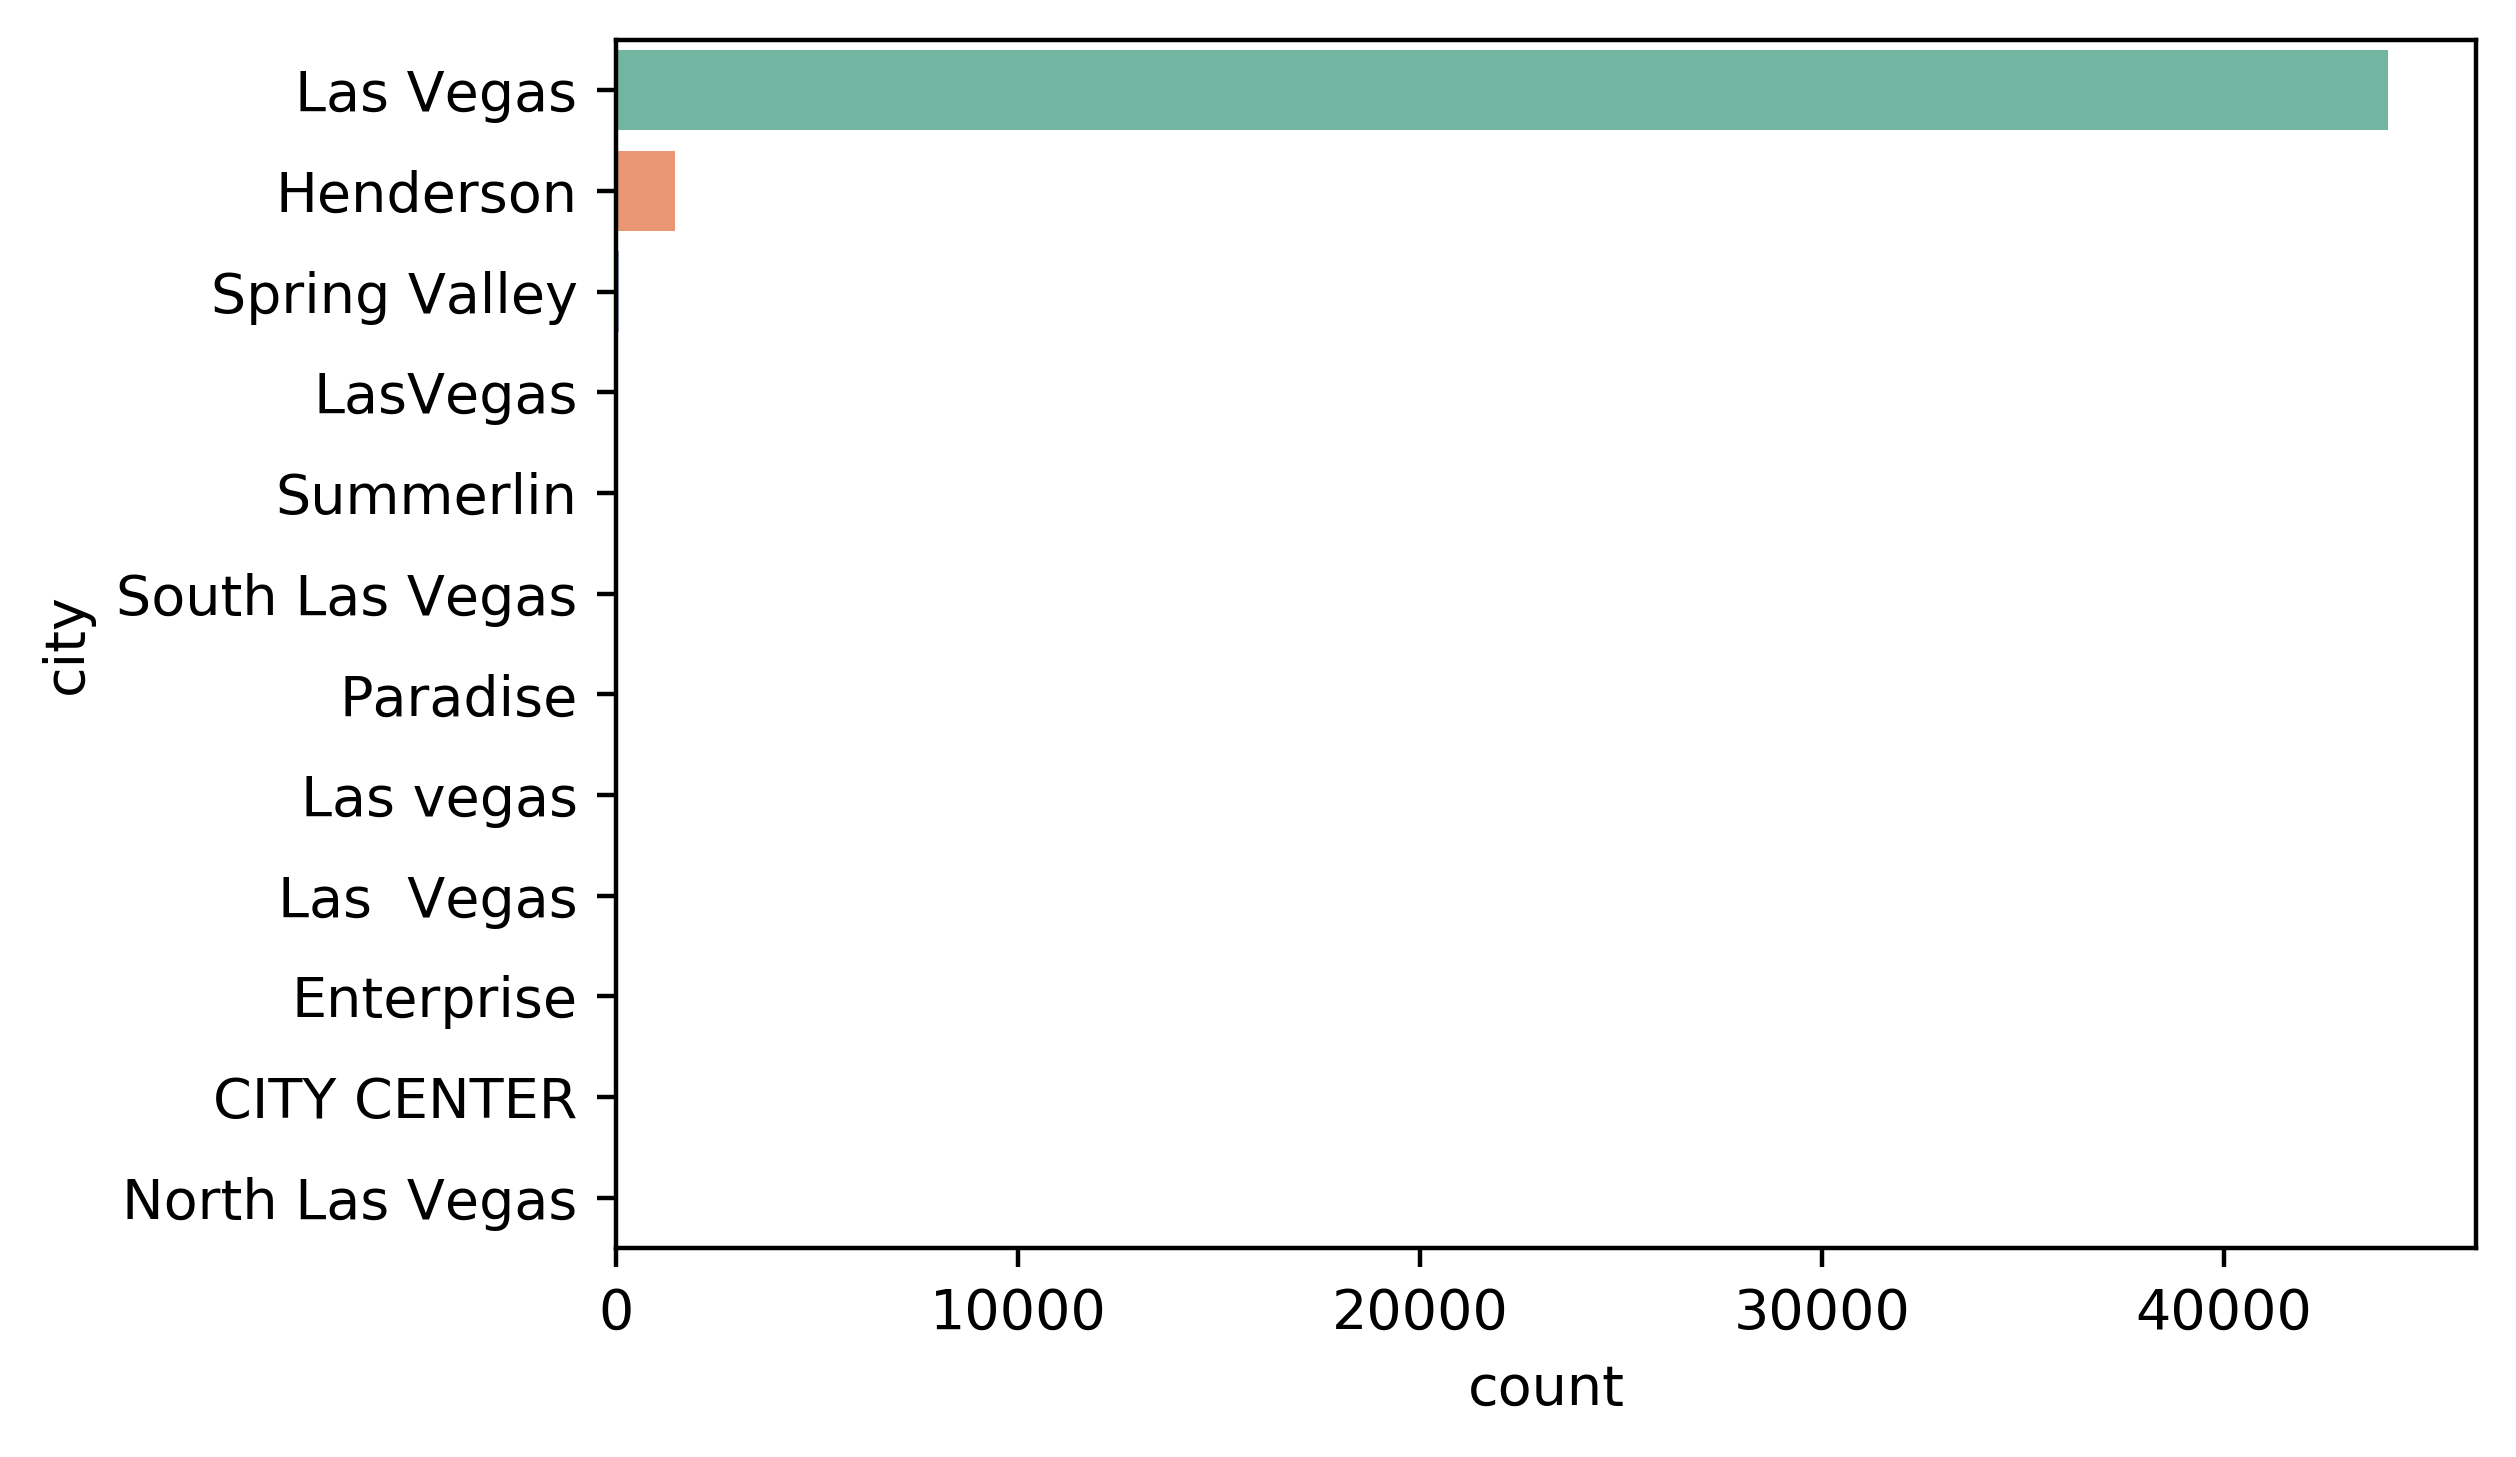

In [148]:
fig, ax = plt.subplots(dpi=200)
sns.countplot(data=df, y='city',palette= sns.color_palette("Set2"))